In [36]:
# Source: https://pypi.python.org/pypi/scholarly/0.2.2
# This one relies on the author having a profile set up
import scholarly    

# Retrieve the author's data, fill-in, and print
#search_query = scholarly.search_author('Dietmar Kültz')
#search_query = scholarly.search_author('Frank Mitloehner')
author = next(search_query).fill()
#print(author)

# Print the titles of the author's publications
print([pub.bib['title'] for pub in author.publications])
#author.publications[0].bib['title']


# Take a closer look at the first publication
#pub = author.publications[0].fill()
#print(pub)

# Which papers cited that publication?
#print([citation.bib['title'] for citation in pub.get_citedby()])

['Molecular and evolutionary basis of the cellular stress response', 'The ecoresponsive genome of Daphnia pulex', 'Regulation of gene expression by hypertonicity', 'In vitro biologic activities of the antimicrobials triclocarban, its analogs, and triclosan in bioassay screens: receptor-based bioassay screens', 'Evolution of the cellular stress proteome: from monophyletic origin to ubiquitous function', 'Hyperosmolality causes growth arrest of murine kidney cells induction of GADD45 and GADD153 by osmosensing via stress-activated protein kinase 2', 'Phylogenetic and functional classification of mitogen-and stress-activated protein kinases', 'Evolution of osmotic stress signaling via MAP kinase cascades.', 'Osmotic regulation of gene expression.', 'Pathway analysis of kidney cancer using proteomics and metabolic profiling', 'Hyperosmolality in the form of elevated NaCl but not urea causes DNA damage in murine kidney cells', 'Osmotic stress sensing and signaling in fishes', 'Protection of

In [84]:
import scholarly
import pandas as pd

def get_pubs(name):
    search_query = scholarly.search_author(name)
    try:
        author = next(search_query).fill()
        list = [author.publications[0].bib['title'],author.publications[1].bib['title']]
        for i in range(len(author.publications)):
            list.append(author.publications[i].bib['title'])
        df = pd.DataFrame(list[2:])
        df.columns=["title"]
        df.insert(0, "school", "Davis")
        df.insert(1, "name", name.split()[-1])
    except:
        print("no profile for", name)
        df = pd.DataFrame()
    return df;   

In [99]:
davis_profs = ["Trish Berger", "Richard Blatchford", "David Bunn", "Hao Cheng",
               "Fred Conte", "Anna Denicol", "Mary Delany", "Edward DePeters",
               "John Eadie", "James Fadel", "Jackson Gross", "Matthias Hess", 
               "Kristina Horback", "Russ Hovey", "Josh Hull", "Silas Hung", 
               "Ermias Kebreab", "Annie King", "Kirk Klasing", "Dietmar Kueltz",  
               "Yanhong Liu", "Elizabeth Maga", "Maja Makagon", "Bernie May", 
               "Juan Medrano", "Deanne Meyer", "Michael Mienaltowski", 
               "Michael Miller", "Frank Mitloehner", "James Murray", "Anita Oberbauer", 
               "James Oltjen", "Lee Allen Pettey", "Peter Robinson", "Pablo Ross", 
               "Roberto Sainz", "Andrea Schreier", "Anne Todgham", "Cassandra Tucker",
               "Alison Van Eenennaam", "Jason Watters", "Crystal Yang", "Huaijun Zhou", 
               "Richard Zinn"]

In [101]:
davis = get_pubs("Trish Berger") # Use the first item to initialize the data frame

for x in davis_profs[1:]: # Skip the first item to avoid duplicate row
    df = get_pubs(x) # WARNING: this takes forever to run!!
    davis = pd.concat([davis, df])

no profile for Richard blatchford
no profile for Fred Conte
no profile for Edward DePeters
no profile for James Fadel
no profile for Jackson Gross
no profile for Matthias Hess
no profile for Russ Hovey
no profile for Silas Hung
no profile for Kirk Klasing
no profile for Elizabeth Maga
no profile for Bernie May
no profile for Deanna Meyer
no profile for Michael Mienaltowski
no profile for Frank Mitloehner
no profile for Anita Oberbauer
no profile for James Oltjen
no profile for Lee Allen Pettey
no profile for Huaijun Zhou
no profile for Richard Zinn


In [163]:
# Drop out all observations that are for the wrong person
wrong = ["Anna Denicol", "Hao Cheng", "Josh Hull", "Xiang Yang", "Mary Delany", "Annie King",
        "Yanhong Liu", "Michael Miller", "James Murray", "Peter Robinson", "Roberto Sainz",
        "Jason Watters"]

davis = davis[~davis.name.isin(wrong)]

In [103]:
# Save data in case Google scholar makes changes that break the package I'm using
davis.to_csv("davis.txt", sep=' ', index=False, header=False)

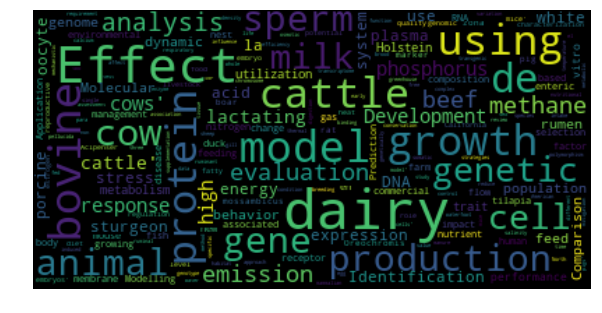

In [167]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

#wordcloud = WordCloud(collocations=False).generate(str(davis["title"].tolist()))

# Display the generated image:
# the matplotlib way:

#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, collocations=False).generate(str(davis["title"].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
#Search one at a time

#search_query = scholarly.search_pubs_query('Frank Mitloehner')
#print(next(search_query))

In [34]:
import gsscraper
# Doesn't work

query = "albert einstein"
gsscraper.get_results(query,5)

[]

In [33]:
#import gscholar
# This got my IP address banned

#gscholar.query("albert einstein")


HTTPError: HTTP Error 503: Service Unavailable